Based on several research papers we have read we found out that there are 3 groups of sound features that get affected by the Parkinson Disease: Phonation, articulation and prosody.


We will start extracting the phonation features that get affected by the parkinson disease based on (1):

Feature                      |            Effect

Jitter                        |    Higher in PD than healthy

Shimmer                        |   Higher in PD than healthy

Harmonics-to-noise ratio        |  Lower in PD than in healthy	

Correlation Dimension (D2)       | Higher in PD than in healthy

Pitch Period Entropy              |Higher in PD than in healthy	

Using: C:\Users\user\Downloads\23849127\HC_AH\HC_AH\AH_121A_BD5BA248-E807-4CB9-8B53-47E7FFE5F8E2.wav


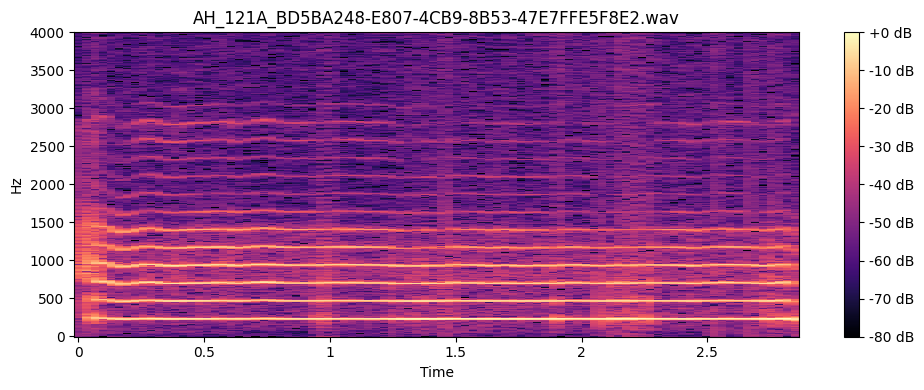

In [1]:
import os
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np

# Correct folder (note the two HC_AH)
folder = r"C:\Users\user\Downloads\23849127\HC_AH\HC_AH"

# Choose the exact file name you want
filename = r"AH_121A_BD5BA248-E807-4CB9-8B53-47E7FFE5F8E2.wav"

file_path = os.path.join(folder, filename)
print("Using:", file_path)

y, sr = librosa.load(file_path, sr=None)

n_fft = 1024
hop_length = 256
D = librosa.stft(y, n_fft=n_fft, hop_length=hop_length)
S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)

plt.figure(figsize=(10, 4))
librosa.display.specshow(S_db, sr=sr, hop_length=hop_length,
                         x_axis='time', y_axis='hz')
plt.colorbar(format="%+2.0f dB")
plt.title(os.path.basename(file_path))
plt.tight_layout()
plt.show()


Spectrogram Analysis:

ReminderdB=20*log(base10)​(level/reference level​).

We can look at the 2 pictures for the harmonics. We can observe that each sound with a specific frequency f0=1/T has corresponding harmonics which are waves with frequncy=k*f0.  

T: period  

In the spectrogram we can see bright lines appearing at frequency= (around)250*k where k is positive integer in {1;2;....}. In other words, the bright lines exist at the different harmonics of the sound.

What the bright lines signify? 

Bright lines are formed when db=0 (look at right of spectrogram plot). 0 db means that sound level is the same as the refernce level.

Level is how strong the sound is (linked to sound pressure level).

Reference level is the highest level in voice recording.

I plotted one spectrogram for a specific recording for a healthy person.

Next stpes: I will plot the spectrogram for 2 more healthy persons and then plot the spectrogram for 3 diseased persons and based on the spectrograms I will get I will choose my frequency celing and floor to exclude any noises that may lead to some errors in feature extraction.


=== HEALTHY RECORDINGS ===
Using: C:\Users\user\Downloads\23849127\HC_AH\HC_AH\AH_121A_BD5BA248-E807-4CB9-8B53-47E7FFE5F8E2.wav


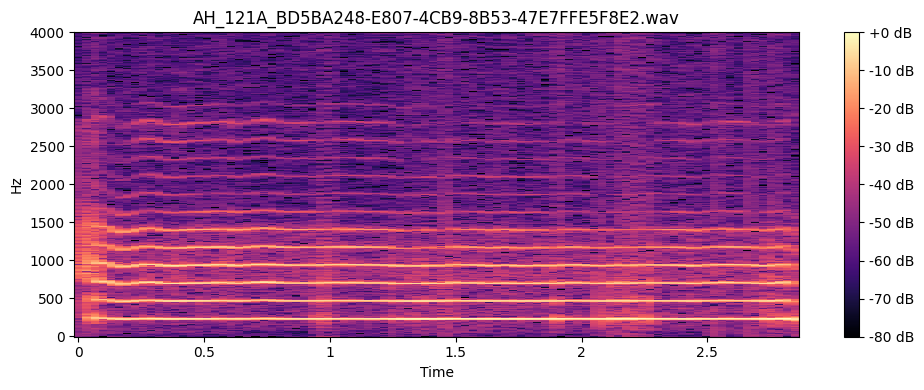

Using: C:\Users\user\Downloads\23849127\HC_AH\HC_AH\AH_619B_5CF9C4CA-31AA-4F22-8E57-8E53618CC224.wav


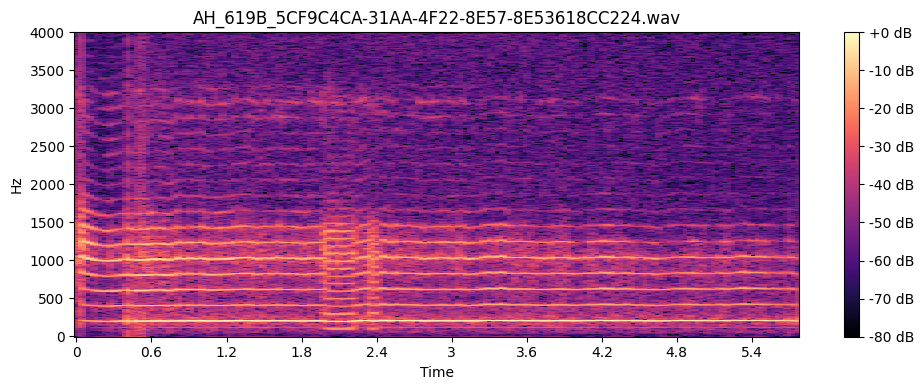

Using: C:\Users\user\Downloads\23849127\HC_AH\HC_AH\AH_420J_07C96C2C-6E96-4A2F-BEC9-5CB71DB309B6.wav


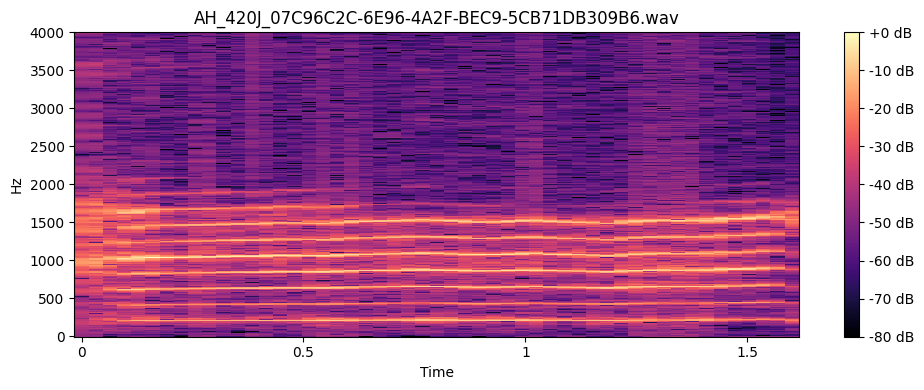


=== PD RECORDINGS ===
Using: C:\Users\user\Downloads\23849127\PD_AH\PD_AH\AH_545753013-FCFF8F46-08FF-4C87-B443-D2039E5DA945.wav


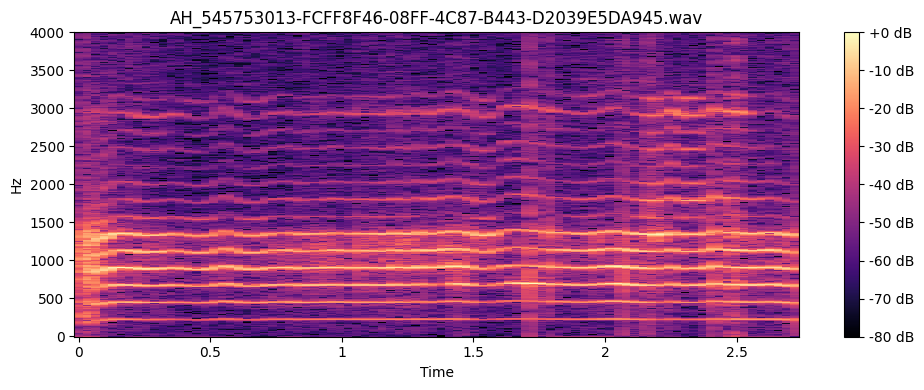

Using: C:\Users\user\Downloads\23849127\PD_AH\PD_AH\AH_545789671-794D2256-DDFF-4009-8BA8-8A306C8FA14F.wav


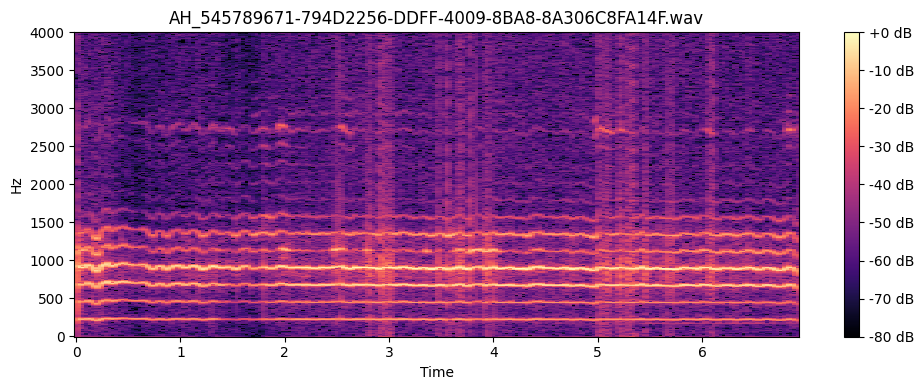

Using: C:\Users\user\Downloads\23849127\PD_AH\PD_AH\AH_545847410-D1BA3BB4-1F61-44CA-ACDE-455A8E97E04B.wav


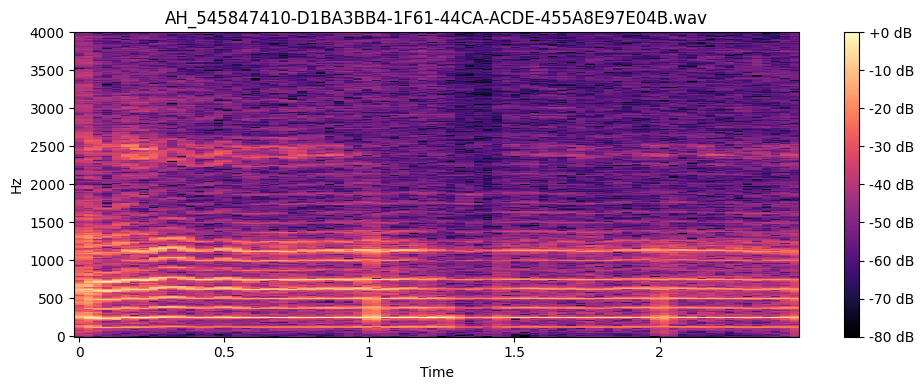

In [2]:
import os
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np


# Healthy recordings
healthy_folder = r"C:\Users\user\Downloads\23849127\HC_AH\HC_AH"
healthy_files = [
    r"AH_121A_BD5BA248-E807-4CB9-8B53-47E7FFE5F8E2.wav",  # the one you already used
    r"AH_619B_5CF9C4CA-31AA-4F22-8E57-8E53618CC224.wav",
    r"AH_420J_07C96C2C-6E96-4A2F-BEC9-5CB71DB309B6.wav",
]

# PD recordings
pd_folder = r"C:\Users\user\Downloads\23849127\PD_AH\PD_AH"
pd_files = [
    r"AH_545753013-FCFF8F46-08FF-4C87-B443-D2039E5DA945.wav",
    r"AH_545789671-794D2256-DDFF-4009-8BA8-8A306C8FA14F.wav",
    r"AH_545847410-D1BA3BB4-1F61-44CA-ACDE-455A8E97E04B.wav",
]

# Spectrogram parameters
n_fft = 1024
hop_length = 256

# Optional: once you decide your band, set them here.
# For now keep them as None to just inspect.
freq_floor = None    # e.g. 80
freq_ceil = None     # e.g. 3000

# ---------- FUNCTION TO PLOT ONE FILE ----------

def plot_spectrogram(folder, filename, freq_floor=None, freq_ceil=None):
    file_path = os.path.join(folder, filename)
    print("Using:", file_path)

    y, sr = librosa.load(file_path, sr=None)

    D = librosa.stft(y, n_fft=n_fft, hop_length=hop_length)
    S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)

    plt.figure(figsize=(10, 4))
    librosa.display.specshow(S_db, sr=sr, hop_length=hop_length,
                             x_axis='time', y_axis='hz')
    plt.colorbar(format="%+2.0f dB")
    plt.title(filename)

    # Draw floor/ceiling lines if provided
    if freq_floor is not None or freq_ceil is not None:
        duration = librosa.get_duration(y=y, sr=sr)
        if freq_floor is not None:
            plt.hlines(freq_floor, xmin=0, xmax=duration,
                       linestyles='--')
        if freq_ceil is not None:
            plt.hlines(freq_ceil, xmin=0, xmax=duration,
                       linestyles='--')

    plt.tight_layout()
    plt.show()

# ---------- PLOT HEALTHY FILES ----------

print("\n=== HEALTHY RECORDINGS ===")
for fname in healthy_files:
    plot_spectrogram(healthy_folder, fname, freq_floor, freq_ceil)

# ---------- PLOT PD FILES ----------

print("\n=== PD RECORDINGS ===")
for fname in pd_files:
    plot_spectrogram(pd_folder, fname, freq_floor, freq_ceil)


Analysis:

I will observe the frequency range where bright lines appear:

Healthy people:

1) The first spectrogram we computed before this block of code shows:200-3100 Hz

2) 200-3100 Hz

3) 200-3200 Hz

Diagnosed people:

4) 200-3200 Hz

5) 200-2900 Hz

6) 100-2600 Hz

Therefore we will choose 3200 (max frequency) as frequency ceiling and 100 (min frequency) frequency floor.

First, we will start now by extracting the jitter feature.

In [4]:
from pathlib import Path
import numpy as np
import pandas as pd
from tqdm import tqdm
import parselmouth
from parselmouth.praat import call


In calculating jitter, Praat must find the pitch(how many times the vocal folds vibrate per second)
Women and men voices vibrate only within a certain range(80-150Hz for men and 150-250Hz for women)

We take 75 for floor and 300 for ceiling to give some threshold for outliers.

In [5]:
PITCH_FLOOR = 100
PITCH_CEILING = 3200


Set the path of the folder containing all voice recordings (.wav files).

Set the name of the .csv file we will generate.

In [6]:
AUDIO_DIR = Path(r"C:\Users\user\Downloads\23849127\HC_AH\HC_AH")
OUTPUT_CSV = "jitter_features.csv"

We will check if a .wav file is not mono ( has more than 1 channel). We need it to be mono for extraction of features in next steps, because otherwise having stereo may lead to errors in features extraction.

In [7]:


import os
import soundfile as sf



stereo_files = []

for root, dirs, files in os.walk(AUDIO_DIR):
    for name in files:
        if name.lower().endswith(".wav"):
            path = os.path.join(root, name)
            info = sf.info(path)  # this does NOT load full audio, just metadata
            if info.channels > 1:
                stereo_files.append(path)

if stereo_files:
    print("✅ Found stereo .wav files:")
    for p in stereo_files:
        print(p)
else:
    print("✅ No stereo .wav files found. All .wav files are mono.")


✅ No stereo .wav files found. All .wav files are mono.


Even though we have only mono audios we will create a function that reduces audio from 2 channels to only 1 channel because we don't know maybe in another dataset we have audios with 2 channels. 

.wav files may have one sound channel(mono) or two(stereo). If a file has 2 channels then we should average them. 

Example: Have R(t) and L(t) new signal =(R(t)+L(t))/2

In [8]:
def to_mono(snd):
    """
    Convert a parselmouth.Sound to a 1D mono numpy array (n_samples,).
    If there are multiple channels, average them across the channel axis.
    """
    arr = snd.values  # shape: (n_channels, n_samples) or (n_samples,)
    
    arr = np.asarray(arr)

    # If shape is (n_channels, n_samples), average over channels
    if arr.ndim == 2:
        mono = arr.mean(axis=0)
    else:
        mono = arr  # already 1D
    
    return mono.astype(float)


Here we are extracting jitter, but what is it?

Jitter is commonly known as the cycle-to-cycle variation in the periodic signal generated at the larynx, more commonly known as the voice box.(2)

In simpler terms, it measures how much the period time differs from one period to another.

Example: period1: 0.8555    period2:0.8567   jitter is the difference between the 2 periods.

It can be measured in several ways:

1)Local jitter: Average absolute cycle-to-cycle variation normalized by the average period time.

2)RAP: Average difference between the current cycle and the average of the current cycle and its 2 neighbors (1 previous and 1 next) normalized by the average period time.

3)PPQ5: Same as RAP but compares the current cycle with the average of the current cycle with the 2 previous cycles and 2 next cycles normalized by the average period time.

Note :Cycle = Period 

In [7]:
def extract_jitter_for_file(wav_path: Path,
                            pitch_floor=PITCH_FLOOR,
                            pitch_ceiling=PITCH_CEILING):
    # load wav file as Parselmouth Sound Object.
    snd = parselmouth.Sound(str(wav_path))
    # convert to mono
    snd = to_mono(snd)
    # get total duration of recording
    duration = snd.get_total_duration()

    # Build PointProcess using pitch limits in Hz
    pp = call(snd, "To PointProcess (periodic, cc)", pitch_floor, pitch_ceiling)

    # Convert pitch limits (Hz) -> period limits (seconds)
    min_period = 1.0 / pitch_ceiling
    max_period = 1.0 / pitch_floor
    max_period_factor = 1.3  # Praat default

    # Jitter funcs expect: (tmin, tmax, minPeriod, maxPeriod, maxPeriodFactor)
    jitter_local = call(pp, "Get jitter (local)", 0, 0, min_period, max_period, max_period_factor)
    jitter_rap   = call(pp, "Get jitter (rap)",   0, 0, min_period, max_period, max_period_factor)
    jitter_ppq5  = call(pp, "Get jitter (ppq5)",  0, 0, min_period, max_period, max_period_factor)

    return {
        "filename": wav_path.name,
        "relpath": str(wav_path.as_posix()),
        "duration_sec": duration,
        "jitter_local": jitter_local,
        "jitter_rap": jitter_rap,
        "jitter_ppq5": jitter_ppq5,
    }

Iterate over all the .wav files and extracting the jitter feature(local, RAP and PPQ5) from them and append it to the csv file for each iteration. Then compute each value in percentage by multiplying by 100 mainly because differences are small.

In [8]:
wav_files = sorted(list(AUDIO_DIR.rglob("*.wav")) + list(AUDIO_DIR.rglob("*.WAV")))
if not wav_files:
    print(f"No .wav files found under: {AUDIO_DIR.resolve()}")

rows = []
for f in tqdm(wav_files, desc="Extracting jitter"):
    try:
        rows.append(extract_jitter_for_file(f))
    except Exception as e:
        rows.append({
            "filename": f.name,
            "relpath": str(f.as_posix()),
            "duration_sec": np.nan,
            "jitter_local": np.nan,
            "jitter_rap": np.nan,
            "jitter_ppq5": np.nan,
            "error": str(e)
        })

df = pd.DataFrame(rows)
for col in ["jitter_local", "jitter_rap", "jitter_ppq5"]:
    if col in df.columns:
        df[col + "_pct"] = df[col] * 100.0

df.to_csv(OUTPUT_CSV, index=False)
print(f"✅ Done. Saved {len(df)} rows to {OUTPUT_CSV}")
df.head()


Extracting jitter: 100%|██████████| 82/82 [00:01<00:00, 48.17it/s]

✅ Done. Saved 82 rows to jitter_features.csv


,filename,relpath,duration_sec,jitter_local,jitter_rap,jitter_ppq5,jitter_local_pct,jitter_rap_pct,jitter_ppq5_pct
0,AH_064F_7AB034C9-72E4-438B-A9B3-AD7FDA1596C5.wav,C:/Users/user/Downloads/23849127/HC_AH/HC_AH/A...,3.738875,0.004138,0.002029,0.002165,0.413828,0.202896,0.216497
1,AH_064F_7AB034C9-72E4-438B-A9B3-AD7FDA1596C5.wav,C:/Users/user/Downloads/23849127/HC_AH/HC_AH/A...,3.738875,0.004138,0.002029,0.002165,0.413828,0.202896,0.216497
2,AH_114S_A89F3548-0B61-4770-B800-2E26AB3908B6.wav,C:/Users/user/Downloads/23849127/HC_AH/HC_AH/A...,2.267375,0.006507,0.003360,0.003994,0.650738,0.335990,0.399415
3,AH_114S_A89F3548-0B61-4770-B800-2E26AB3908B6.wav,C:/Users/user/Downloads/23849127/HC_AH/HC_AH/A...,2.267375,0.006507,0.003360,0.003994,0.650738,0.335990,0.399415
4,AH_121A_BD5BA248-E807-4CB9-8B53-47E7FFE5F8E2.wav,C:/Users/user/Downloads/23849127/HC_AH/HC_AH/A...,2.867625,0.004523,0.002628,0.002686,0.452270,0.262807,0.268571


Here we are extracting shimmer, but what is it?

Shimmer is defined as the variation in the amplitude (peak) of successive glottal cycles (cyclical series of events that produces voicing) in a sustained phonation(aaaa pronounciation in our case). In simpler terms, if the loudness of the voice signal is not consistent across cycles, shimmer values will be high.(3)

Example: period 1: 0.52

    period 2:0.55   
    
    shimmer is the difference between the 2 periods' peaks(0.03).

It can be measured in several ways:

1)Local shimmer: Average absolute cycle-to-cycle variation in peaks normalized by the average amplitude.

2)APQ3: Amplitude Perturbation Quotient over 3 cycles. Compares each cycle to the average of itself and its two neighbors (i−1, i, i+1).

3)APQ5: Amplitude Perturbation Quotient over 5 cycles. Compares each cycle to the average of itself and its four neighbors (i-2,i−1, i, i+1,  i+2).

4)APQ11: same as APQ3 and APQ5 but now with 10 neighbors.

Note :Amplitude = peak amplitude; in the context of shimmer.

In [9]:
OUTPUT_CSV = "shimmer_features.csv"

In [10]:
def extract_shimmer_for_file(wav_path: Path,
                             pitch_floor=PITCH_FLOOR,
                             pitch_ceiling=PITCH_CEILING):
    """Extract shimmer features (local, apq3, apq5, apq11) from a voice recording."""
    snd = parselmouth.Sound(str(wav_path))
    snd = to_mono(snd)
    duration = snd.get_total_duration()

    # Build PointProcess to find glottal pulses
    pp = call(snd, "To PointProcess (periodic, cc)", pitch_floor, pitch_ceiling)

    # Convert pitch limits (Hz) to period limits (seconds)
    min_period = 1.0 / pitch_ceiling
    max_period = 1.0 / pitch_floor
    max_period_factor = 1.3  # Praat default

    # Shimmer functions need both the sound and its PointProcess
    # Format: (Sound, PointProcess, tmin, tmax, minPeriod, maxPeriod, maxPeriodFactor, silenceThreshold, timeFactor)
    # We'll use typical default Praat values for shimmer extraction
    tmin, tmax = 0, 0
    min_period = 1.0 / pitch_ceiling
    max_period = 1.0 / pitch_floor
    max_period_factor   = 1.3   # typical Praat default
    max_amplitude_factor = 1.6   # typical Praat default

    shimmer_local = call([snd, pp], "Get shimmer (local)",
                        tmin, tmax, min_period, max_period,
                        max_period_factor, max_amplitude_factor)

    shimmer_apq3  = call([snd, pp], "Get shimmer (apq3)",
                        tmin, tmax, min_period, max_period,
                        max_period_factor, max_amplitude_factor)

    shimmer_apq5  = call([snd, pp], "Get shimmer (apq5)",
                        tmin, tmax, min_period, max_period,
                        max_period_factor, max_amplitude_factor)

    shimmer_apq11 = call([snd, pp], "Get shimmer (apq11)",
                        tmin, tmax, min_period, max_period,
                        max_period_factor, max_amplitude_factor)

    return {
        "filename": wav_path.name,
        "relpath": str(wav_path.as_posix()),
        "duration_sec": duration,
        "shimmer_local": shimmer_local,
        "shimmer_apq3": shimmer_apq3,
        "shimmer_apq5": shimmer_apq5,
        "shimmer_apq11": shimmer_apq11,
    }

Same as when we have extracted jitter feature. We iterate over all the .wav files and extract the shimmer feature. Then  at the end we add the percentage value of each feature by just multiplying by 100 mainly because differences are small.

In [11]:
wav_files = sorted(list(AUDIO_DIR.rglob("*.wav")) + list(AUDIO_DIR.rglob("*.WAV")))
if not wav_files:
    print(f"No .wav files found under: {AUDIO_DIR.resolve()}")

rows = []
for f in tqdm(wav_files, desc="Extracting shimmer"):
    try:
        rows.append(extract_shimmer_for_file(f))
    except Exception as e:
        rows.append({
            "filename": f.name,
            "relpath": str(f.as_posix()),
            "duration_sec": np.nan,
            "shimmer_local": np.nan,
            "shimmer_apq3": np.nan,
            "shimmer_apq5": np.nan,
            "shimmer_apq11": np.nan,
            "error": str(e)
        })

# Save results to CSV
df = pd.DataFrame(rows)
for col in ["shimmer_local", "shimmer_apq3", "shimmer_apq5", "shimmer_apq11"]:
    if col in df.columns:
        df[col + "_pct"] = df[col] * 100.0  # convert to percentage

df.to_csv(OUTPUT_CSV, index=False)
print(f"✅ Done. Saved {len(df)} rows to {OUTPUT_CSV}")
df.head()

Extracting shimmer: 100%|██████████| 82/82 [00:01<00:00, 68.31it/s]

✅ Done. Saved 82 rows to shimmer_features.csv


,filename,relpath,duration_sec,shimmer_local,shimmer_apq3,shimmer_apq5,shimmer_apq11,shimmer_local_pct,shimmer_apq3_pct,shimmer_apq5_pct,shimmer_apq11_pct
0,AH_064F_7AB034C9-72E4-438B-A9B3-AD7FDA1596C5.wav,C:/Users/user/Downloads/23849127/HC_AH/HC_AH/A...,3.738875,0.039270,0.022047,0.026233,0.033066,3.927010,2.204676,2.623306,3.306593
1,AH_064F_7AB034C9-72E4-438B-A9B3-AD7FDA1596C5.wav,C:/Users/user/Downloads/23849127/HC_AH/HC_AH/A...,3.738875,0.039270,0.022047,0.026233,0.033066,3.927010,2.204676,2.623306,3.306593
2,AH_114S_A89F3548-0B61-4770-B800-2E26AB3908B6.wav,C:/Users/user/Downloads/23849127/HC_AH/HC_AH/A...,2.267375,0.090746,0.047404,0.058570,0.081652,9.074648,4.740402,5.857037,8.165157
3,AH_114S_A89F3548-0B61-4770-B800-2E26AB3908B6.wav,C:/Users/user/Downloads/23849127/HC_AH/HC_AH/A...,2.267375,0.090746,0.047404,0.058570,0.081652,9.074648,4.740402,5.857037,8.165157
4,AH_121A_BD5BA248-E807-4CB9-8B53-47E7FFE5F8E2.wav,C:/Users/user/Downloads/23849127/HC_AH/HC_AH/A...,2.867625,0.047980,0.026239,0.033147,0.043903,4.798035,2.623919,3.314666,4.390286


Here we are extracting harmonics-to-noise ratio, but what is it?

Harmonic to Noise Ratio (HNR) measures the ratio between periodic and non-periodic components of a speech sound.(4) Look at spectrogram (where frequency of harmonics appear and can be distinguishable from other noise) for reference.

The hnr related features we are extracting are:

1) hnr_mean_db: Average HNR of the frames across the entire recording.

2) hnr_median_db: Median HNR of the frames ignoring unvoiced frames.

3) hnr_stdev_db: Standard deviation (how much values of HNR frames vary from mean).


In [12]:
OUTPUT_CSV = "hnr_features.csv"

In [13]:
TIME_STEP = 0.01          # seconds (analysis frame hop)
VOICING_THRESHOLD = 0.1   # used internally in the method (typical default)
SILENCE_THRESHOLD = 1.0    # typical default for (cc) in common examples

In [14]:
def nanmedian_hnr(harm: parselmouth.Harmonicity) -> float:
    """
    Return the median HNR (dB) ignoring undefined frames (≈ -200 dB).
    """
    vals = harm.values.squeeze()  # shape (T,)
    # Treat <= -200 dB as undefined
    vals = np.where(vals <= -200.0, np.nan, vals)
    return float(np.nanmedian(vals))

In [15]:
def extract_hnr_for_file(wav_path: Path,
                         pitch_floor=PITCH_FLOOR,
                         time_step=TIME_STEP,
                         voicing_threshold=VOICING_THRESHOLD,
                         silence_threshold=SILENCE_THRESHOLD):
    snd = parselmouth.Sound(str(wav_path))
    snd = to_mono(snd)
    duration = snd.get_total_duration()

    harm = call(snd, "To Harmonicity (cc)",
                time_step, pitch_floor, voicing_threshold, silence_threshold)

    # Mean & stdev from Praat over full duration
    hnr_mean_db  = call(harm, "Get mean", 0, 0)
    hnr_stdev_db = call(harm, "Get standard deviation", 0, 0)

    # Median computed in NumPy (since "Get quantile" isn't available here)
    hnr_median_db = nanmedian_hnr(harm)

    return {
        "filename": wav_path.name,
        "relpath": str(wav_path.as_posix()),
        "duration_sec": duration,
        "hnr_mean_db": hnr_mean_db,
        "hnr_median_db": hnr_median_db,
        "hnr_stdev_db": hnr_stdev_db,
    }

Calculate the mean, median and standard deviation of each .wav file in the folder.

In [16]:
wav_files = sorted({*AUDIO_DIR.rglob("*.wav"), *AUDIO_DIR.rglob("*.WAV")})
if not wav_files:
    print(f"No .wav files found under: {AUDIO_DIR.resolve()}")

rows = []
for f in tqdm(wav_files, desc="Extracting HNR"):
    try:
        rows.append(extract_hnr_for_file(f))
    except Exception as e:
        rows.append({
            "filename": f.name,
            "relpath": str(f.as_posix()),
            "duration_sec": np.nan,
            "hnr_mean_db": np.nan,
            "hnr_median_db": np.nan,
            "hnr_stdev_db": np.nan,
            "error": str(e)
        })

df = pd.DataFrame(rows)
df.to_csv(OUTPUT_CSV, index=False)
print(f"✅ Done. Saved {len(df)} rows to {OUTPUT_CSV}")

Extracting HNR: 100%|██████████| 41/41 [00:00<00:00, 96.52it/s]

✅ Done. Saved 41 rows to hnr_features.csv


Correlation Dimension D2

The correlation dimension (D2) is a quantitative measure that may specify the number of degrees of freedom (ie, dimensions) needed to describe a dynamic system. If the dynamics of a system can be determined to be low dimensional, then a complex determinism may exist, which is responsible for the observed signal profile. Alternatively, the more complex the system, the greater the number of degrees of freedom needed to describe its dynamic state, and the higher the correlation dimension.(5)

In simpler terms, The more complicated / irregular the system’s behavior, the more independent variables you need to describe it, and the higher the correlation (different than correlation we know) dimension D2.

The correlation dimension D2 provides a single scalar value per recording. This value summarizes the dynamical complexity of the voice signal: higher D2 indicates that the signal explores more independent degrees of freedom in its underlying dynamics.



In [9]:
import nolds

In [10]:
OUTPUT_CSV = "D2_features.csv"
EMBED_DIM = 10        # embedding dimension (try 8–12 typically)
SAMPLE_TRIM = 50000   # number of samples to use (optional: shorter = faster)


In [11]:
def extract_d2_for_file(wav_path: Path,
                        emb_dim=EMBED_DIM,
                        sample_trim=SAMPLE_TRIM):
    """
    Compute the correlation dimension D2 of the speech waveform.
    """
    snd = parselmouth.Sound(str(wav_path))
    samples = to_mono(snd)
    fs = snd.sampling_frequency

    # Optionally trim to make computation faster (for long files)
    if len(samples) > sample_trim:
        samples = samples[:sample_trim]

    # Normalize samples (zero mean, unit variance)
    samples = (samples - np.mean(samples)) / np.std(samples)

    # Compute correlation dimension (D2)
    try:
        d2 = nolds.corr_dim(samples, emb_dim)
        return {
            "filename": wav_path.name,
            "relpath": str(wav_path.as_posix()),
            "duration_sec": snd.get_total_duration(),
            "correlation_dimension_d2": d2,
        }
    except Exception as e:
        return {
            "filename": wav_path.name,
            "relpath": str(wav_path.as_posix()),
            "duration_sec": snd.get_total_duration(),
            "correlation_dimension_d2": np.nan,
            "error": str(e)
        }

In [12]:
wav_files = sorted({*AUDIO_DIR.rglob("*.wav"), *AUDIO_DIR.rglob("*.WAV")})
rows = []
for f in tqdm(wav_files, desc="Extracting D2"):
    rows.append(extract_d2_for_file(f))

df = pd.DataFrame(rows)
df.to_csv(OUTPUT_CSV, index=False)
print(f"✅ Done. Saved {len(df)} rows to {OUTPUT_CSV}")
df.head()

Extracting D2:   0%|          | 0/41 [00:30<?, ?it/s]


KeyboardInterrupt: 

Pitch Period Entropy

Pitch Period Entropy (PPE) is a single-number measure that quantifies how irregular and hard to control the pitch periods of a sustained voice are, after removing normal vibrato and average pitch differences. It reflects the randomness of vocal fold vibration timing: higher PPE means more chaotic pitch period fluctuations and therefore more irregular voice control.

1) Should have a sustained vowel "aaaa" recording.

2) Extract the fundamental frequency (F0) for each small frame of the signal.

3) Transform F0(t) into log scale to reduce the effect of different average pitches.

4) Use linear prediction(LP) filter to predict each pitch value from previous ones. Compute the residual=actual pitch - predicted pitch for each frame. The residual keeps mainly the irregular, hard-to-predict changes in pitch.

5) Make a histogram of the residual values and turn it into probabilities.

6) Calculate how spread out or random the values are(pitch period entropy).

7) Results analysis: 

Low ppe-> voice is regular

High ppe-> voice is irregular

In [21]:
from pathlib import Path
import numpy as np
import pandas as pd
import parselmouth
from parselmouth.praat import call
from scipy.signal import lfilter

# Optional (recommended) for LPC whitening; otherwise fallback used
try:
    import librosa
    HAVE_LIBROSA = True
except Exception:
    HAVE_LIBROSA = False

# ---------- Config ----------
AUDIO_DIR = Path(r"C:\Users\user\Downloads\23849127\HC_AH\HC_AH")  # <- put your folder here
OUTPUT_CSV = "ppe_features.csv"

# Pitch settings (Hz). Use your previous floor/ceiling that worked for jitter/shimmer.
PITCH_FLOOR = 60.0
PITCH_CEILING = 400.0

# PPE settings
SEMITONE_REF_HZ = 130.81  # C3 (as in Little et al. examples)
LPC_ORDER = 3             # small AR order to remove smooth vibrato
N_BINS = 50               # histogram bins for entropy
HIST_RANGE = (-1.0, 1.0)  # semitone range for residuals (robust & close to paper figures)

def hz_to_semitone(f0_hz, ref_hz=SEMITONE_REF_HZ):
    """Convert Hz to semitones relative to ref note: 12 * log2(f/ref)."""
    f0 = np.asarray(f0_hz, dtype=float)
    with np.errstate(divide="ignore", invalid="ignore"):
        st = 12.0 * np.log2(f0 / ref_hz)
    return st

def lpc_whiten(x, order=LPC_ORDER):
    """
    Apply a simple LPC whitening:
      - If librosa is available: use librosa.lpc to get AR coefficients a (length order+1, a[0]=1)
        and compute residual e = lfilter(a, [1], x).
      - Else: fallback to 1st-order high-pass on a moving mean (keeps PPE usable).
    Returns residual same length as x.
    """
    x = np.asarray(x, dtype=float)
    # Remove NaNs before LPC; interpolate small gaps if any
    good = np.isfinite(x)
    if good.sum() < max(order + 5, 20):
        # too short or many NaNs → fallback detrend
        return detrend_fallback(x)

    # simple linear interpolation over NaNs to make LPC stable
    if not good.all():
        idx = np.arange(len(x))
        x[~good] = np.interp(idx[~good], idx[good], x[good])

    if HAVE_LIBROSA:
        a = librosa.lpc(x, order=order)  # a[0]=1
        e = lfilter(a, [1.0], x)         # inverse filtering → residual
        return e
    else:
        return detrend_fallback(x)

def detrend_fallback(x, win=201):
    """
    Smooth-moving-average removal + first-difference as a robust fallback.
    """
    x = np.asarray(x, dtype=float)
    n = len(x)
    if n < 5:
        return np.zeros_like(x)

    w = min(win, n - (1 - n % 2))  # ensure odd, <= n
    if w % 2 == 0:
        w -= 1
    # simple moving average via convolution
    kern = np.ones(w) / w
    smooth = np.convolve(np.nan_to_num(x), kern, mode="same")
    resid = x - smooth
    # light high-pass: first difference (pad to original length)
    diff = np.empty_like(resid)
    diff[0] = 0.0
    diff[1:] = resid[1:] - resid[:-1]
    return diff

def shannon_entropy_from_hist(samples, bins=N_BINS, rng=HIST_RANGE):
    """
    Discrete Shannon entropy H = -sum p log p (natural log).
    Also return normalized H / log(#bins) in [0,1].
    """
    samples = np.asarray(samples, dtype=float)
    samples = samples[np.isfinite(samples)]
    if samples.size == 0:
        return np.nan, np.nan

    counts, edges = np.histogram(samples, bins=bins, range=rng)
    p = counts.astype(float)
    total = p.sum()
    if total <= 0:
        return np.nan, np.nan
    p /= total
    # avoid log(0)
    p = p[p > 0]
    H = -np.sum(p * np.log(p))
    H_norm = H / np.log(bins)
    return float(H), float(H_norm)

def extract_ppe_for_file(wav_path: Path,
                         pitch_floor=PITCH_FLOOR,
                         pitch_ceiling=PITCH_CEILING):
    """
    Compute PPE for a single WAV:
      1) F0 with Praat (autocorrelation)
      2) Convert to semitone scale
      3) LPC-whiten to remove smooth trends
      4) Entropy of residual semitone distribution (raw and normalized)
    """
    snd = parselmouth.Sound(str(wav_path))
    duration = snd.get_total_duration()

    # Praat pitch
    # time_step=0 lets Praat choose; units Hz; voicing threshold default OK
    pitch = call(snd, "To Pitch (ac)", 0, pitch_floor, pitch_ceiling)
    # Get vector of times & F0 values
    n = call(pitch, "Get number of frames")
    f0_vals = []
    for i in range(1, n + 1):
        f0 = call(pitch, "Get value in frame", i)  # Hz, undefined=NaN
        f0_vals.append(f0 if np.isfinite(f0) and f0 > 0 else np.nan)
    f0_vals = np.array(f0_vals, dtype=float)

    # Require enough voiced frames
    voiced = np.isfinite(f0_vals)
    if voiced.sum() < 20:
        raise RuntimeError("Not enough voiced frames for reliable PPE.")

    # 1) Hz → semitone
    st = hz_to_semitone(f0_vals, ref_hz=SEMITONE_REF_HZ)

    # 2) remove smooth variations (vibrato/microtremor) via light LPC whitening
    #    (interpolates small gaps internally)
    resid = lpc_whiten(st, order=LPC_ORDER)

    # 3) Entropy of residual semitone variations
    H_raw, H_norm = shannon_entropy_from_hist(resid[np.isfinite(resid)],
                                              bins=N_BINS, rng=HIST_RANGE)

    return {
        "filename": wav_path.name,
        "relpath": str(wav_path.as_posix()),
        "duration_sec": duration,
        "ppe_raw": H_raw,      # natural-log entropy of the histogram
        "ppe_norm": H_norm,    # normalized to 0–1 by log(#bins)
        "voiced_frames": int(voiced.sum()),
    }

def main():
    rows = []
    wavs = sorted([p for p in AUDIO_DIR.rglob("*.wav")])
    if not wavs:
        print(f"No .wav files under {AUDIO_DIR}")
        return

    for wav in wavs:
        try:
            feat = extract_ppe_for_file(wav)
            feat["error"] = ""
        except Exception as e:
            feat = {
                "filename": wav.name,
                "relpath": str(wav.as_posix()),
                "duration_sec": np.nan,
                "ppe_raw": np.nan,
                "ppe_norm": np.nan,
                "voiced_frames": 0,
                "error": str(e),
            }
        rows.append(feat)

    df = pd.DataFrame(rows, columns=[
        "filename", "relpath", "duration_sec", "ppe_raw", "ppe_norm", "voiced_frames", "error"
    ])
    df.to_csv(OUTPUT_CSV, index=False)
    print(f"Saved {len(df)} rows → {OUTPUT_CSV}")

if __name__ == "__main__":
    main()


Saved 41 rows → ppe_features.csv


References:

1) https://pmc.ncbi.nlm.nih.gov/articles/PMC11939921/#sec4-brainsci-15-00320

2) https://scholarworks.umt.edu/umcur/2012/poster_2/4/

3) https://blog.phonalyze.com/understanding-shimmer-in-voice-assessment-with-phonalyze/

4) https://www.sciencedirect.com/science/article/pii/S1877050918316739

5) https://www.sciencedirect.com/science/article/abs/pii/S0892199708001951?

6) https://pmc.ncbi.nlm.nih.gov/articles/PMC3051371/#T2
